# Exploring Supervised Learniing
### @Neural Network classifier @Support Vector Machine classifier @Random Forest Classifier @Pair-wise Classifier

In [1]:
import pandas as pd
import numpy as np

## visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#### Reading the TMNIST dataset, dataset of handwritten alphabets

In [2]:
tmnist_data = pd.read_csv('tmnst.csv')
tmnist_data[:5]

,labels,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


####  Remove all columns where all values are zero

In [3]:
tmnist = tmnist_data.loc[:, tmnist_data.sum() != 0]
tmnist[0:5]   ## The number of columns with atleast 1 value is 690, hence, the new DF has 690 columns.

,labels,9,10,11,12,13,14,15,16,17,...,768,769,770,771,772,773,774,775,776,777
0,D,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,F,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,J,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,H,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,A,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Normalize each pixel value from [0,1] range instead of [0,255] now

In [4]:
tmnist.loc[:, tmnist.columns.difference(['labels'])] = tmnist.loc[:, tmnist.columns.difference(['labels'])].div(255)
## Divding all columns other than Labels by 255

print(tmnist.shape)
## each alphabet has 2874 rows.
## (26 * 2874, 28 * 28)

(74724, 690)


#### Split each class into 70% train and 30% test split

In [5]:
## Separating the features into X and label in Y
X = tmnist.iloc[:, 1:]
Y = tmnist['labels']

In [7]:
## divide into Test-Train with stratify on labels so that, we have an uniform 70-30 split of each label
from sklearn.model_selection import train_test_split
y = tmnist['labels']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.3, stratify = y, random_state = 0)

### Neural Network Classifier

In [9]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

In [10]:
# Define the model
def NNModel(layers, hidden, classes, X_train, Y_train, X_test, Y_test):
    model = Sequential()
    
    # Add the first hidden layer of neurons and input shape
    model.add(Dense(hidden[0], activation='relu', input_shape=(X_train.shape[1],)))
    
    # Add the second hidden layer of neurons
    if layers == 2:   # the model is supposed to have a second layer, set it up
        model.add(Dense(hidden[1], activation='relu'))
    
    # Output layer with sigmoid activation for binary classification
    model.add(Dense(classes, activation='softmax'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    model.fit(X_train, Y_train, epochs=10, batch_size=32, validation_split=0.2)
    
    # Test the model on the Test data
    pred = model.predict(X_test)
    acc  = model.evaluate(X_test, Y_test)
    test_acc = acc[1]
    
    # get the number of parameters
    total_params = 0
    for layer in model.layers:
        layer_params = layer.count_params()
        total_params += layer_params
        
    return test_acc, total_params

In [11]:
NN_classifer = {'Architecture':[],
                'Parameters':[],
                'Test_accuracy':[]}

In [12]:
def model_call(layer, hidden, classes, X_train, Y_train, X_test, Y_test, arch):
    # def NNModel(layers, hidden, classes, X_train, Y_train, X_test, Y_test)
    test_acc, param = NNModel(layer, hidden, 26, X_train, Y_train, X_test, Y_test)
    
    ## setup the file 
    NN_classifer['Architecture'].append(arch)
    NN_classifer['Parameters'].append(param)
    NN_classifer['Test_accuracy'].append(test_acc)

In [15]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
X_trn = X_train
X_tst = X_test
Y_trn = label_encoder.fit_transform(Y_train)
Y_tst = label_encoder.fit_transform(Y_test)

layers = [1, 2]
neurons = [5, 10, 20, 25]

for layer in layers:
    if layer == 1:
        for n in neurons:
            hidden = []
            hidden.append(n)
            arch = f"{layer}-{n}"
            print("Layer {0} and Hidden {1} ".format(layer,hidden))
            model_call(layer, hidden, 26, X_trn, Y_trn, X_tst, Y_tst, arch)
    elif layer == 2:
        for n1 in neurons[0:2]:
            for n2 in neurons[0:2]:
                hidden = []
                hidden.append(n1)
                hidden.append(n2)
                arch = f"{layer}-{n1}-{n2}"
                print("Layer {0} and Hidden {1} ".format(layer,hidden))
                model_call(layer, hidden, 26, X_trn, Y_trn, X_tst, Y_tst, arch)

Layer 1 and Hidden [5] 


C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3515 - loss: 2.2972 - val_accuracy: 0.7957 - val_loss: 0.9055
Epoch 2/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8110 - loss: 0.8263 - val_accuracy: 0.8428 - val_loss: 0.7120
Epoch 3/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8506 - loss: 0.6765 - val_accuracy: 0.8601 - val_loss: 0.6447
Epoch 4/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8680 - loss: 0.6023 - val_accuracy: 0.8734 - val_loss: 0.6008
Epoch 5/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8725 - loss: 0.5754 - val_accuracy: 0.8756 - val_loss: 0.5763
Epoch 6/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8750 - loss: 0.5570 - val_accuracy: 0.8815 - val_loss: 0.5567
Epoch 7/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8814 - loss: 0.5387 - val_accuracy: 0.8830 - val_loss: 0.5470
Epoch 8/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8846 - loss: 0.5221 - 

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5828 - loss: 1.7128 - val_accuracy: 0.8959 - val_loss: 0.4801
Epoch 2/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9028 - loss: 0.4433 - val_accuracy: 0.9182 - val_loss: 0.3707
Epoch 3/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9230 - loss: 0.3468 - val_accuracy: 0.9253 - val_loss: 0.3346
Epoch 4/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9289 - loss: 0.3243 - val_accuracy: 0.9319 - val_loss: 0.3119
Epoch 5/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9372 - loss: 0.2819 - val_accuracy: 0.9345 - val_loss: 0.2990
Epoch 6/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9398 - loss: 0.2753 - val_accuracy: 0.9363 - val_loss: 0.2949
Epoch 7/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9418 - loss: 0.2735 - val_accuracy: 0.9363 - val_loss: 0.2904
Epoch 8/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9405 - loss: 0.2608 - 

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.7008 - loss: 1.3044 - val_accuracy: 0.9189 - val_loss: 0.3553
Epoch 2/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9286 - loss: 0.3179 - val_accuracy: 0.9360 - val_loss: 0.2865
Epoch 3/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9411 - loss: 0.2623 - val_accuracy: 0.9402 - val_loss: 0.2678
Epoch 4/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9473 - loss: 0.2404 - val_accuracy: 0.9445 - val_loss: 0.2522
Epoch 5/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9505 - loss: 0.2246 - val_accuracy: 0.9443 - val_loss: 0.2501
Epoch 6/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9525 - loss: 0.2110 - val_accuracy: 0.9479 - val_loss: 0.2376
Epoch 7/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9540 - loss: 0.2029 - val_accuracy: 0.9496 - val_loss: 0.2351
Epoch 8/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9573 - loss: 0.1949 - 

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7017 - loss: 1.2712 - val_accuracy: 0.9255 - val_loss: 0.3322
Epoch 2/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9300 - loss: 0.2983 - val_accuracy: 0.9365 - val_loss: 0.2804
Epoch 3/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9433 - loss: 0.2504 - val_accuracy: 0.9432 - val_loss: 0.2555
Epoch 4/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9479 - loss: 0.2290 - val_accuracy: 0.9477 - val_loss: 0.2407
Epoch 5/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9515 - loss: 0.2080 - val_accuracy: 0.9457 - val_loss: 0.2450
Epoch 6/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9562 - loss: 0.1907 - val_accuracy: 0.9465 - val_loss: 0.2367
Epoch 7/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9565 - loss: 0.1893 - val_accuracy: 0.9475 - val_loss: 0.2293
Epoch 8/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9621 - loss: 0.1691 - 

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.2373 - loss: 2.6182 - val_accuracy: 0.6520 - val_loss: 1.2595
Epoch 2/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6924 - loss: 1.1256 - val_accuracy: 0.7828 - val_loss: 0.8895
Epoch 3/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7959 - loss: 0.8372 - val_accuracy: 0.8218 - val_loss: 0.7717
Epoch 4/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8316 - loss: 0.7275 - val_accuracy: 0.8435 - val_loss: 0.7043
Epoch 5/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8568 - loss: 0.6444 - val_accuracy: 0.8573 - val_loss: 0.6601
Epoch 6/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8612 - loss: 0.6276 - val_accuracy: 0.8665 - val_loss: 0.6344
Epoch 7/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8742 - loss: 0.5838 - val_accuracy: 0.8690 - val_loss: 0.6194
Epoch 8/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8721 - loss: 0.5848 - 

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4188 - loss: 2.1029 - val_accuracy: 0.8244 - val_loss: 0.7546
Epoch 2/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8363 - loss: 0.6960 - val_accuracy: 0.8594 - val_loss: 0.6182
Epoch 3/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8605 - loss: 0.6046 - val_accuracy: 0.8712 - val_loss: 0.5712
Epoch 4/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8740 - loss: 0.5527 - val_accuracy: 0.8730 - val_loss: 0.5597
Epoch 5/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8851 - loss: 0.5087 - val_accuracy: 0.8821 - val_loss: 0.5373
Epoch 6/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8904 - loss: 0.4838 - val_accuracy: 0.8834 - val_loss: 0.5266
Epoch 7/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8907 - loss: 0.4737 - val_accuracy: 0.8925 - val_loss: 0.5039
Epoch 8/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8987 - loss: 0.4606 - 

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.3185 - loss: 2.4122 - val_accuracy: 0.7588 - val_loss: 1.0443
Epoch 2/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7913 - loss: 0.8776 - val_accuracy: 0.8474 - val_loss: 0.6691
Epoch 3/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8676 - loss: 0.5921 - val_accuracy: 0.8815 - val_loss: 0.5579
Epoch 4/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8912 - loss: 0.5047 - val_accuracy: 0.8927 - val_loss: 0.5019
Epoch 5/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9032 - loss: 0.4454 - val_accuracy: 0.8977 - val_loss: 0.4732
Epoch 6/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9049 - loss: 0.4307 - val_accuracy: 0.9006 - val_loss: 0.4507
Epoch 7/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9114 - loss: 0.3971 - val_accuracy: 0.9078 - val_loss: 0.4327
Epoch 8/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9150 - loss: 0.3802 - 

C:\Users\admin\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.4710 - loss: 1.9938 - val_accuracy: 0.8564 - val_loss: 0.6404
Epoch 2/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8689 - loss: 0.5745 - val_accuracy: 0.8888 - val_loss: 0.4954
Epoch 3/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.8942 - loss: 0.4697 - val_accuracy: 0.9030 - val_loss: 0.4428
Epoch 4/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9077 - loss: 0.4117 - val_accuracy: 0.9106 - val_loss: 0.4025
Epoch 5/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9154 - loss: 0.3796 - val_accuracy: 0.9164 - val_loss: 0.3911
Epoch 6/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9168 - loss: 0.3687 - val_accuracy: 0.9183 - val_loss: 0.3753
Epoch 7/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9220 - loss: 0.3409 - val_accuracy: 0.9193 - val_loss: 0.3716
Epoch 8/10
1308/1308 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9272 - loss: 0.3269 - 

In [16]:
# Write the NN_classifer value file
file_df_list = pd.DataFrame.from_dict(NN_classifer)
file_df_list.to_csv('NN_classifer.csv', index=False, sep=',')

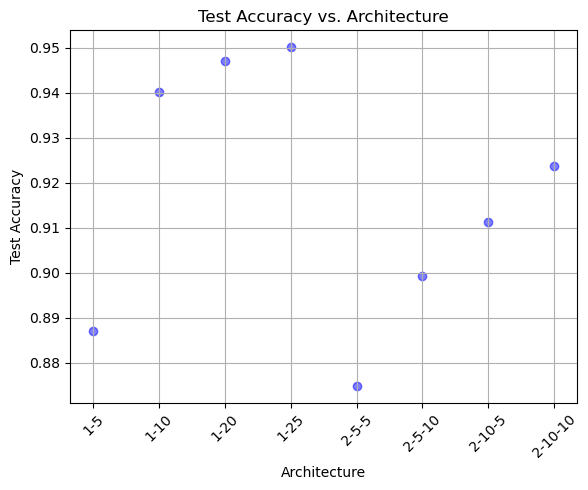

In [19]:
# Create a scatter plot
plt.figure(figsize=(6, 5))
plt.scatter(NN_classifer['Architecture'], NN_classifer['Test_accuracy'], color='blue', alpha=0.5)
plt.title('Test Accuracy vs. Architecture')
plt.xlabel('Architecture')
plt.ylabel('Test Accuracy')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

#### Conclusion:
It shows that as the number of neurons are increased, the test accuracy also increases for the individual models with 1 Layer or 2 Layers.
It should be better to say that it is the number of parameters which increases as the number of nuerons are increased and in turn improves the performance of the model.

### Support Vector Machines Classifier

In [20]:
from sklearn.svm import LinearSVC
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

In [21]:
def linearSVM(X_train, y_train, X_test, y_test, c):
    # Create Linear SVM classifier with C, the regularization parameter
    svm = LinearSVC(C=c)
    # Train the model on the training data
    svm.fit(X_train, y_train)

    support_vectors = np.sum(svm.coef_ != 0)

    # Predict the labels for train set
    y_pred = svm.predict(X_train)

    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_pred)
    
    # Predict the labels for test set
    y_pred = svm.predict(X_test)

    # Calculate accuracy
    test_acc = accuracy_score(y_test, y_pred)

    return support_vectors, train_acc, test_acc

In [38]:
def polySVM(X_train, y_train, X_test, y_test, d):
    # Create Polynomial SVM classifier with degree = d
    svm_poly = SVC(kernel= 'poly', degree= d, C= 10, coef0= 1.0)

    # Train the model on the training data
    svm_poly.fit(X_train, y_train)

    support_vectors = svm_poly.n_support_
    support_vectors = support_vectors.sum()

    # Predict the labels for train set
    y_pred_poly = svm_poly.predict(X_train)

    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_pred_poly)   

    # Predict the labels for test set
    y_pred_poly = svm_poly.predict(X_test)

    # Calculate accuracy
    test_acc = accuracy_score(y_test, y_pred_poly)

    return support_vectors, train_acc, test_acc

In [41]:
def rbf_svm(X_train, y_train, X_test, y_test, sigma):
    # Calculate gamma value from sigma
    gamma = 1 / (2 * sigma ** 2)

    # Create RBF SVM classifier with gamma = gamma
    svm_rbf = SVC(kernel='rbf', gamma=gamma)
    
    # Train the model on the training data
    svm_rbf.fit(X_train, y_train)

    support_vectors = svm_rbf.n_support_
    support_vectors = support_vectors.sum()

    # Predict the labels for train set
    y_pred_rbf = svm_rbf.predict(X_train)

    # Calculate accuracy
    train_acc = accuracy_score(y_train, y_pred_rbf)

    # Predict the labels for test set
    y_pred_rbf = svm_rbf.predict(X_test)

    # Calculate accuracy
    test_acc = accuracy_score(y_test, y_pred_rbf)

    return support_vectors, train_acc, test_acc

In [42]:
def svm_explore(X_train, X_test, Y_train, Y_test, C1, C2):
    
    for c in range(5,51,5):
        support_vectors, train_acc, test_acc = linearSVM(X_train, Y_train, X_test, Y_test, c)
        SVM_Classifier['Classifier'].append(f"Linear/C={c}")
        SVM_Classifier['#Support_Vectors'].append(support_vectors)
        SVM_Classifier['Train_accuracy'].append(train_acc)
        SVM_Classifier['Test_accuracy'].append(test_acc)
    print('Linear SVM is complete')    
    for d in range(2,6):
        support_vectors, train_acc, test_acc = polySVM(X_train, Y_train, X_test, Y_test, d)
        SVM_Classifier['Classifier'].append(f"Poly/d={d}")
        SVM_Classifier['#Support_Vectors'].append(support_vectors)
        SVM_Classifier['Train_accuracy'].append(train_acc)
        SVM_Classifier['Test_accuracy'].append(test_acc)
    print('Polynomial SVM is complete')    
    for s in range(2,11,2):
        support_vectors, train_acc, test_acc = rbf_svm(X_train, Y_train, X_test, Y_test, s)
        SVM_Classifier['Classifier'].append(f"RBF/sigma={s}")
        SVM_Classifier['#Support_Vectors'].append(support_vectors)
        SVM_Classifier['Train_accuracy'].append(train_acc)
        SVM_Classifier['Test_accuracy'].append(test_acc)
    print('SVM RBF is complete')

In [43]:
SVM_Classifier = {'Classifier':[],
                  '#Support_Vectors':[],
                  'Train_accuracy':[],
                  'Test_accuracy':[]}

Class = ['A', 'R']
data_Q2 = tmnist[tmnist['labels'].isin(Class)]

## Separating the features into X and label in Y
X = data_Q2.iloc[:, 1:]
Y = data_Q2['labels']

## divide into Test-Train with stratify on labels so that, we have an uniform 70-30 split of each label
y = data_Q2['labels']
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X, Y, test_size = 0.3, stratify = y, random_state = 0)

svm_explore(X_trn, X_tst, Y_trn, Y_tst, Class[0], Class[1])

C:\Users\admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\admin\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number 

Linear SVM is complete
Polynomial SVM is complete
SVM RBF is complete


#### Observation:
The Linear SVM model need more iterations to converge hence giving a warning.
As per documnetation, the default max_iter s 1000, whch is used here.

In [44]:
# Write the SVM_Classifier value file
file_df_list = pd.DataFrame.from_dict(SVM_Classifier)
file_df_list.to_csv('SVM_Classifier.csv', index=False, sep=',')

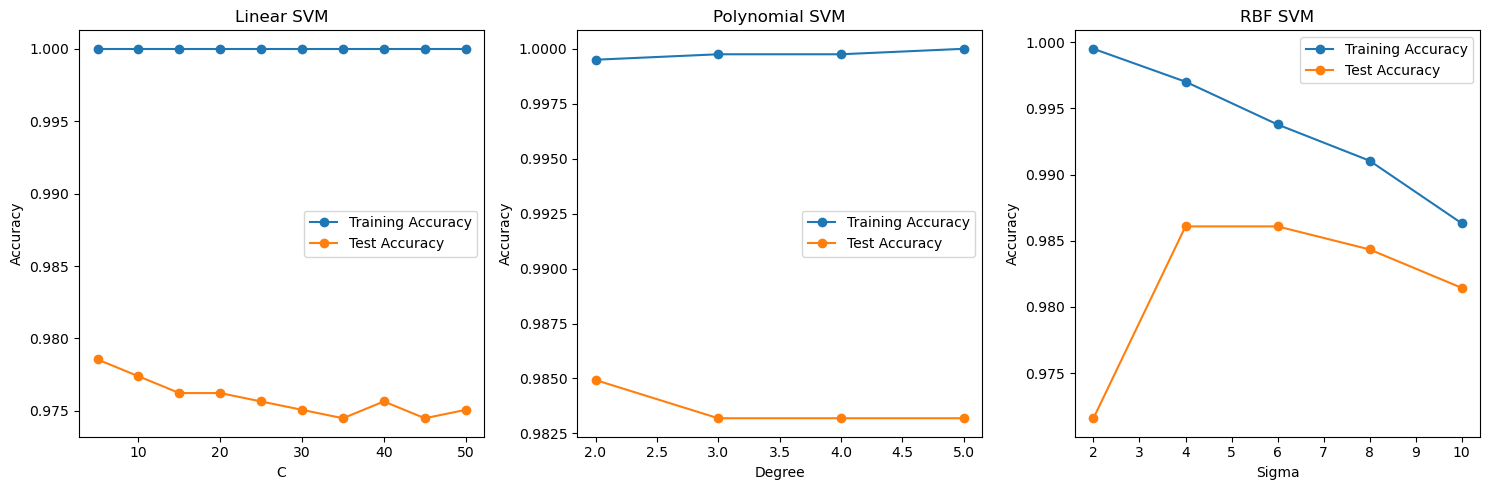

In [45]:
file_df_list[['SVM_Type', 'Hyperparameters']] = file_df_list['Classifier'].str.split('/', expand=True)
file_df_list['Hyperparameter_Value'] = file_df_list['Hyperparameters'].str.split('=').str[1]

# Convert hyperparameter values to numeric (if applicable)
file_df_list['Hyperparameter_Value'] = pd.to_numeric(file_df_list['Hyperparameter_Value'])

# Separate DataFrame for each type of SVM classifier
linear_svm = file_df_list[file_df_list['SVM_Type'] == 'Linear']
poly_svm = file_df_list[file_df_list['SVM_Type'] == 'Poly']
rbf_svm = file_df_list[file_df_list['SVM_Type'] == 'RBF']

# Create plots
plt.figure(figsize=(15, 5))

# Linear SVM plot
plt.subplot(1, 3, 1)
plt.plot(linear_svm['Hyperparameter_Value'], linear_svm['Train_accuracy'], marker='o', label='Training Accuracy')
plt.plot(linear_svm['Hyperparameter_Value'], linear_svm['Test_accuracy'], marker='o', label='Test Accuracy')
plt.title('Linear SVM')
plt.xlabel('C')
plt.ylabel('Accuracy')
plt.legend()

# Polynomial SVM plot
plt.subplot(1, 3, 2)
plt.plot(poly_svm['Hyperparameter_Value'], poly_svm['Train_accuracy'], marker='o', label='Training Accuracy')
plt.plot(poly_svm['Hyperparameter_Value'], poly_svm['Test_accuracy'], marker='o', label='Test Accuracy')
plt.title('Polynomial SVM')
plt.xlabel('Degree')
plt.ylabel('Accuracy')
plt.legend()

# RBF SVM plot
plt.subplot(1, 3, 3)
plt.plot(rbf_svm['Hyperparameter_Value'], rbf_svm['Train_accuracy'], marker='o', label='Training Accuracy')
plt.plot(rbf_svm['Hyperparameter_Value'], rbf_svm['Test_accuracy'], marker='o', label='Test Accuracy')
plt.title('RBF SVM')
plt.xlabel('Sigma')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

Regularization paremeter, C in Linear SVM controls the Trade-off between maximizing the margin and minimizing the classifcation error.
As we increase the value of C, the test accuracy falls as it would lead to over-fitting. At lower values of C, it allows for better generalization to unseen data (test data) and hence show better accuracy.
Given the data, C of 5 yields the best accuracy.

Degree in Polynomial SVM determines the complexiy of the decision boundary. A higher degree helps to capture greater complexity but also overfits the data, while a smaller degree sets up for simpler boundary which again will underfit the data.
We need to hit the correct balance and set the degree at the optimum test accuracy.
Given the data, a polinomial of degree 2 is the best fit.

Gamma in Radial Basis Function(RBF) SVM controls the Kernel coefficient.
A large value of gamma leads to complex decision boundary with overfitting of the data while a small value will lead to smoother boundary.
Given the data, a gamma of 4 yeilds the best result, after that it overfits and there is a fall in test accuracy.

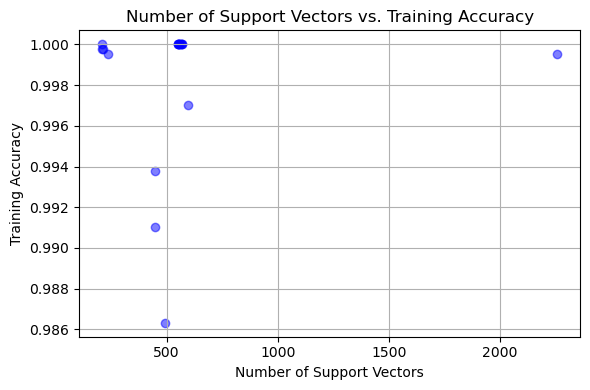

In [46]:
# Create scatter plot
plt.figure(figsize=(6, 4))
plt.scatter(file_df_list['#Support_Vectors'], file_df_list['Train_accuracy'], color='blue', alpha=0.5)
plt.title('Number of Support Vectors vs. Training Accuracy')
plt.xlabel('Number of Support Vectors')
plt.ylabel('Training Accuracy')
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

With a total Support vectors around 500, we have been able to reach the optimal training accuracy, 1.00
One instance of 2000+ support vectors is yielding a high training accuracy but not 1.00

### Random Forrest Classifier

In [47]:
from sklearn.ensemble import RandomForestClassifier

In [48]:
def rf_classifier(X_train, y_train, X_test, y_test, nooftrees, maxdepth):
    # Create a Random Forest classifier with trees and max depth as hyper-parameters
    rf_classifier = RandomForestClassifier(n_estimators= nooftrees, max_depth=maxdepth)

    # Train the classifier on the training data
    rf_classifier.fit(X_train, y_train)

    # Predict the labels for the train data
    y_pred_rf = rf_classifier.predict(X_train)

    # Evaluate the accuracy of the classifier
    train_acc = accuracy_score(y_train, y_pred_rf)

    # Predict the labels for the test data
    y_pred_rf = rf_classifier.predict(X_test)

    # Evaluate the accuracy of the classifier
    test_acc = accuracy_score(y_test, y_pred_rf)

    return train_acc, test_acc

In [49]:
RF_Classifier = {'No_of_trees':[],
                 'Max_depth':[],
                 'Train_accuracy':[],
                 'Test_accuracy':[]}

Class = ['A', 'R']
data_Q3 = tmnist[tmnist['labels'].isin(Class)]

## Separating the features into X and label in Y
X = data_Q3.iloc[:, 1:]
Y = data_Q3['labels']

## divide into Test-Train with stratify on labels so that, we have an uniform 70-30 split of each label
y = data_Q3['labels']
X_trn, X_tst, Y_trn, Y_tst = train_test_split(X, Y, test_size = 0.3, stratify = y, random_state = 0)

for maxdepth in range(3,11,1):
    print('maxdepth {0} in progress'.format(maxdepth))
    for nooftrees in range(5,101,5):
        train_acc, test_acc = rf_classifier(X_trn, Y_trn, X_tst, Y_tst, nooftrees, maxdepth)
        RF_Classifier['No_of_trees'].append(nooftrees)
        RF_Classifier['Max_depth'].append(maxdepth)
        RF_Classifier['Train_accuracy'].append(train_acc)
        RF_Classifier['Test_accuracy'].append(test_acc)

maxdepth 3 in progress
maxdepth 4 in progress
maxdepth 5 in progress
maxdepth 6 in progress
maxdepth 7 in progress
maxdepth 8 in progress
maxdepth 9 in progress
maxdepth 10 in progress


In [50]:
# Write the RF_Classifier value file
file_df_list = pd.DataFrame.from_dict(RF_Classifier)
file_df_list.to_csv('RF_Classifier.csv', index=False, sep=',')

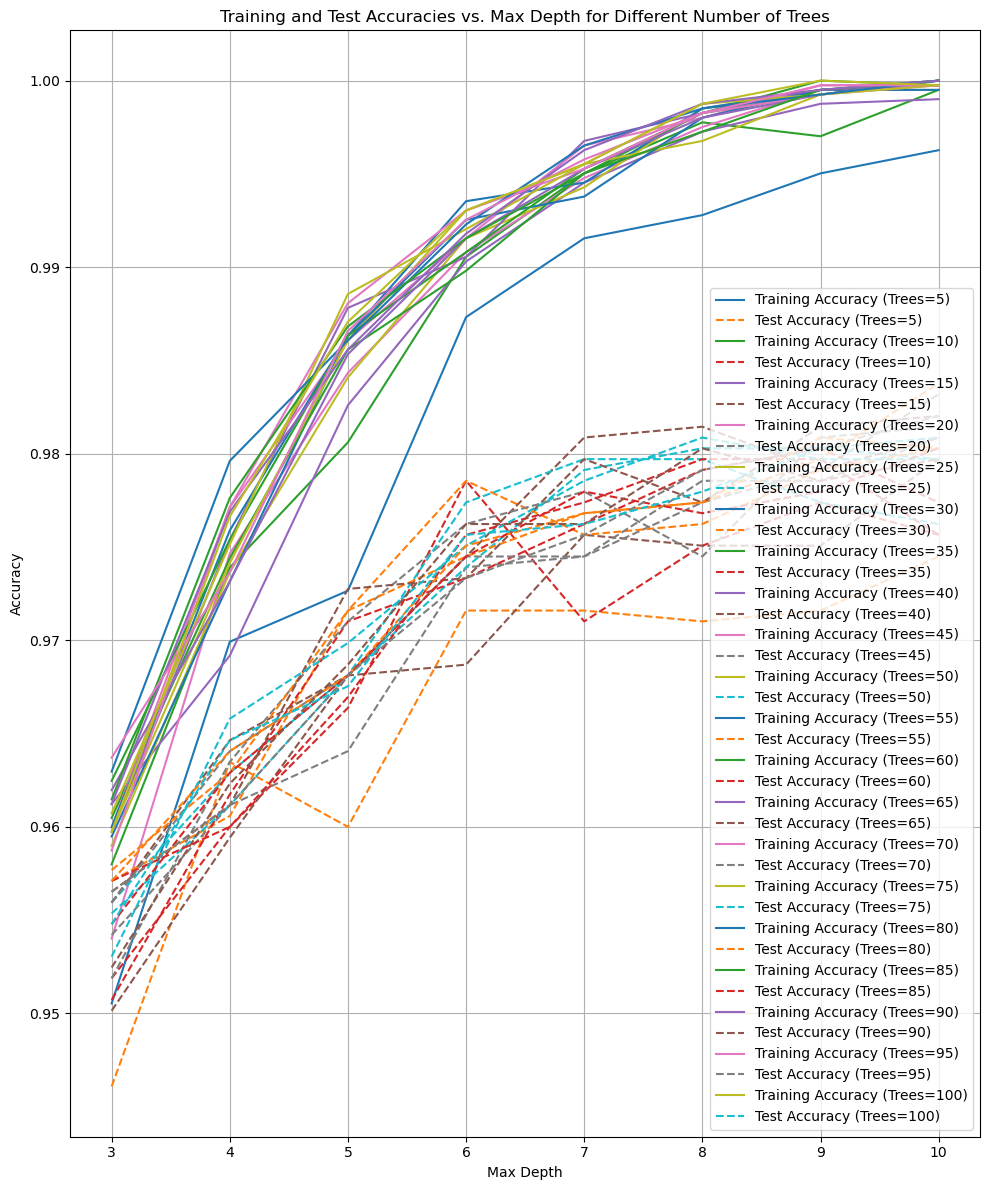

In [58]:
# Get unique values of 'No_of_trees'
unique_trees = file_df_list['No_of_trees'].unique()

# Create a line plot for each unique number of trees
plt.figure(figsize=(10,12))
for num_trees in unique_trees:
    # Filter DataFrame for the current number of trees
    subset = file_df_list[file_df_list['No_of_trees'] == num_trees]
    
    # Plot training accuracy
    plt.plot(subset['Max_depth'], subset['Train_accuracy'], label=f'Training Accuracy (Trees={num_trees})')
    
    # Plot test accuracy
    plt.plot(subset['Max_depth'], subset['Test_accuracy'], label=f'Test Accuracy (Trees={num_trees})', linestyle='--')

plt.title('Training and Test Accuracies vs. Max Depth for Different Number of Trees')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


#### Number of Trees in a Random Forest for fixed Depth
The hyperparameter to control the trees in a Forest. Hgher number of trees improve the performance of the Random forest as it improves to learn more complex relationships. A large number of trees leads to reduced overfitting while too many tress may lead to degradation in performance.

Given the data, for a set depth, as we increase the number of trees, we see that the test accuracy keeps going up as if trying to find the global maxima.

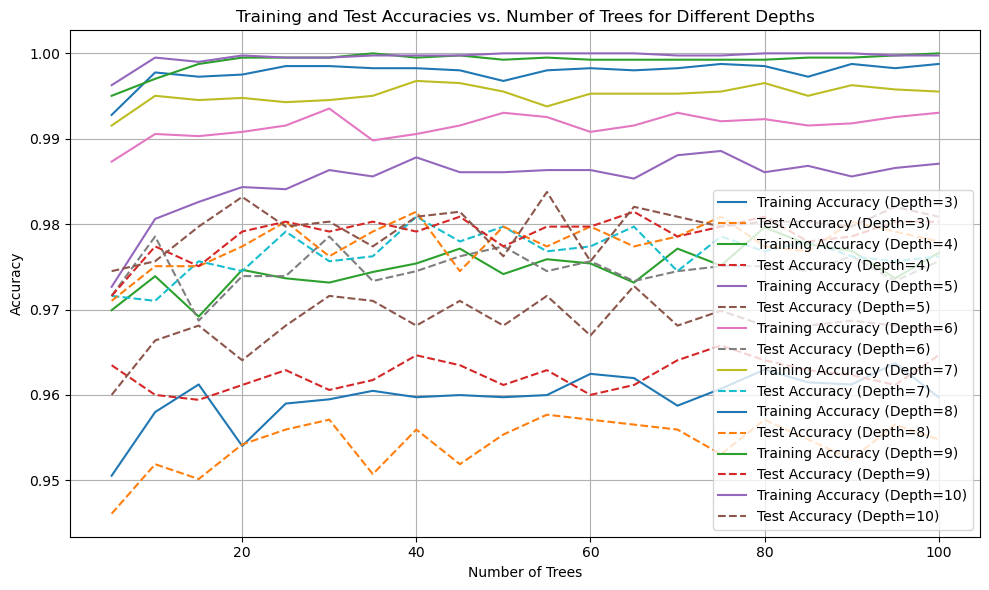

In [55]:
# Get unique values of 'Max_depth'
unique_depths = file_df_list['Max_depth'].unique()

# Create a line plot for each unique depth
plt.figure(figsize=(10, 6))
for depth in unique_depths:
    # Filter DataFrame for the current depth
    subset = file_df_list[file_df_list['Max_depth'] == depth]
    
    # Plot training accuracy
    plt.plot(subset['No_of_trees'], subset['Train_accuracy'], label=f'Training Accuracy (Depth={depth})')
    
    # Plot test accuracy
    plt.plot(subset['No_of_trees'], subset['Test_accuracy'], label=f'Test Accuracy (Depth={depth})', linestyle='--')

plt.title('Training and Test Accuracies vs. Number of Trees for Different Depths')
plt.xlabel('Number of Trees')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()


#### Max depth in a Random Forest for number of trees
An increase in the depth of a each decision tree helps to learn complex patterns, but if we keep on increasing the depth, it will introduce overfitting of the data. So, having an optimum depth will help to reduce overfitting and also help in greater generalization. if we set the depth to very small values, it will underfit the data. We need to hit the correct depth.

#### Trade-off
We may tune the model by tweaking the hyperparameters. We need to avoid overfitting of the data and also need to be accurate in our classification.
So, to hit the correct point, we need to come to a trade-off where we choose a value for Numnber of trees and max depth to best fit the data. 
This best fit should not degrade the performance of the model and also not overfit.

### Pair-wise Classifier

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score
from sklearn.svm import SVC

In [89]:
label_encoder = LabelEncoder()
data_Q4 = tmnist.copy()

print("tmnist: {0}, data_Q4: {1}".format(tmnist.shape,data_Q4.shape))

data_Q4['labels'] = label_encoder.fit_transform(data_Q4['labels'])

print("Number of labels: ", data_Q4['labels'].unique())

Pair_wise_Classifier = {'Class_1':[],
                        'Class_2':[],
                        'Test_accuracy':[]}

tmnist: (74724, 690), data_Q4: (74724, 690)
Number of labels:  [ 3  5  9  7  0  6 22 13 15 23  8 24 19 10  4 21 12 18 20  2  1 14 17 25
 16 11]


In [91]:
for class_pair in [(i, i+1) for i in range(0, 25)]:
    # Extract samples for the current pair of classes
    
    pair_data = data_Q4[data_Q4['labels'].isin(class_pair)]
    #print("class pair {0}/{1} in progress".format(class_pair[0],class_pair[1]))
    
    # Extract features (X) and labels (y)
    Y = pair_data['labels']
    X = pair_data.drop(columns=['labels'])
      
    # Compute Fisher discriminant analysis
    lda = LDA(n_components= None)  # Extract all Fisher dimensions
    X_lda = lda.fit_transform(X, Y)
    
    # Retrieve the explained variance ratio of each discriminant dimension
    explained_variance_ratio = lda.explained_variance_ratio_
    
    # Sort the dimensions based on their discriminative power (explained variance ratio)
    sorted_indices = explained_variance_ratio.argsort()[::-1]

    # Select the top 30 discriminant dimensions
    top_30_dimensions = X_lda[:, sorted_indices[:30]]

    ## divide into Test-Train so that, we have an uniform 70-30 split of each label
    X_trn, X_tst, Y_trn, Y_tst = train_test_split(top_30_dimensions, Y, test_size = 0.3, random_state = 0)

    # Initialize a Linear SVM classifier
    svm = SVC(kernel='linear', C=1.0)
    
    # Train Linear SVM on the reduced data
    svm.fit(X_trn, Y_trn)

    # Predict labels for the test data using the trained Linear SVM classifier
    y_pred_test = svm.predict(X_tst)

    # Compute the accuracy of the classifier on the test data
    test_acc = accuracy_score(Y_tst, y_pred_test)
    
    Pair_wise_Classifier['Class_1'].append(class_pair[0])
    Pair_wise_Classifier['Class_2'].append(class_pair[1])
    Pair_wise_Classifier['Test_accuracy'].append(test_acc)
print("Complete")

Complete


In [93]:
# Write the Pair_wise_Classifier value file
file_df_list = pd.DataFrame.from_dict(Pair_wise_Classifier)
file_df_list.to_csv('Pair_wise_Classifier.csv', index=False, sep=',')

#### Conclusion:
From the data, it is seen that the classifier is able to distinguish between alphabets which are easily identified with greater accuracy (K-L easy ones). While for the case where it is not easy (I-J tough one) the accuracy is seen to be minimum in the combinations.
This surely makes sense.